# 불균형 데이터 처리 실습 

* 기출문제 22회 

> 1-2-1 업 샘플링 과정 설명하고 결과 작성 <br> <br>
> * 답안<br> 
> 데이터 세트의 균형을 맞추기 위해 업 샘플링을 적용할 수 있다. <br>
> 대표적으로 랜덤 오버샘플링과 KNN을 이용한 SMOTE기법이 있다. <br>
> 1) 랜덤오버샘플링은 소수 클래스의 정보를 복제하여 다수 클래스의 크기에 맞추는 기법이며, 이는 오버피팅의 우려가 있다. <br>
> 2) SMOTE는 KNN을 이용하여 최근접 이웃의 거리 계산을 통해 K개의 중간 지점의 데이터를 생성한다. 오버피팅을 막을 수 있으나, 새로운 데이터나 작은 데이터셋에서는 사용하기가 어렵다. <br>
<br>

> 1-2-2 언더 샘플링 과정 설명하고 결과 작성 <br> <br>
> * 답안 <br> 
> 언더 샘플링은 다수 데이터를 소수 데이터의 크기에 맞추는 기법이다. <br>
> 랜덤 샘플링을 통해 소수의 클래스로 만드는 과정에서 데이터의 손실이 발생하는 문제가 있을 수 있다. 
> 소수 클래스의 크기가 너무 작을 경우 머신러닝 과정에서의 과소적합이 발생할 수 있다. 

> 1-2-3 둘 중 선택하고 이유 설명 <br> <br>
> * 해당 데이터에서 소수 클래스의 수는 50개이고 다수 클래스의 데이터는 700행이다. <br>
간단하게 RandomForestClassifier에 해당 데이터를 학습시켜본 결과 언더샘플링 기법을 이용한 결과가 불균형 데이터를 사용한 결과보다 더 안좋음을 알 수 있었고, SMOTE기법을 사용했을 때, 가장 좋은 결과를 도출해낼 수 있었다.  <br>
> 그러므로 해당 데이터에서 오버샘플링을 선택하였다. 


* 기출문제 23회 

> 1-2-1 데이터에 불균형이 있는지 확인, 불균형 판단 근거 작성  <br> <br>
> 1-2-2 오버샘플링 방법들 중 2개 선택하고 장단점 등 선정 이유 제시  <br> <br>
> 1-2-3 오버샘플링 수행 및 결과, 잘 되었다는 것을 판단해라  <br>


In [1]:
import pandas as pd

credit = pd.read_csv("../data/credit_final.csv")



In [2]:
import numpy as np 
class_1 = credit[credit['credit.rating']==1]
class_0 = credit[credit['credit.rating']==0].sample(50)

In [3]:
credit = pd.concat([class_1,class_0])

In [4]:
X = credit.drop(['credit.rating'],axis=1)
y = credit['credit.rating']

In [5]:
y.value_counts()

1    700
0     50
Name: credit.rating, dtype: int64

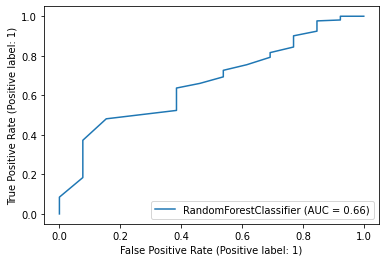

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=321)
clf = RandomForestClassifier(random_state=321) 
clf.fit(X_train,y_train)

plot_roc_curve(clf, X_test, y_test)

In [28]:
from imblearn.under_sampling import RandomUnderSampler
X_resampled, y_resampled = RandomUnderSampler(random_state=0).fit_resample(X_train, y_train)

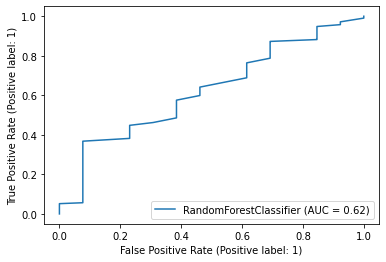

In [29]:
clf_re = RandomForestClassifier(random_state=0) 
clf_re.fit(X_resampled,y_resampled)

plot_roc_curve(clf_re, X_test, y_test)

In [30]:
from imblearn.over_sampling import SMOTE
# 모델설정
sm = SMOTE( k_neighbors=5,random_state=2020)

# train데이터를 넣어 복제함
X_resampled_over, y_resampled_over = sm.fit_resample(X_train,y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_resampled_over.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_resampled_over.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_resampled_over==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_resampled_over==0)))

After OverSampling, the shape of train_X: (976, 20)
After OverSampling, the shape of train_y: (976,) 

After OverSampling, counts of label '1': 488
After OverSampling, counts of label '0': 488


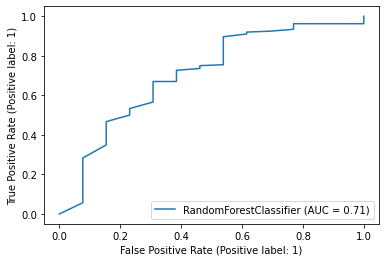

In [31]:
clf_over = RandomForestClassifier(random_state=2020) 
clf_over.fit(X_resampled_over,y_resampled_over)

plot_roc_curve(clf_over, X_test, y_test)